# Computation on Arrays: Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [1]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizesâ€“for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [2]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

In [3]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [4]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting examples

In [5]:
M = np.ones((2, 3))
a = np.arange(3)
print("M.shape =", M.shape)
print("a.shape =", a.shape)

M.shape = (2, 3)
a.shape = (3,)


In [6]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [7]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print("a.shape =", a.shape)
print("b.shape =", b.shape)

a.shape = (3, 1)
b.shape = (3,)


In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [9]:
M = np.ones((3, 2))
a = np.arange(3)
print("M.shape =", M.shape)
print("a.shape =", a.shape)

M.shape = (3, 2)
a.shape = (3,)


In [10]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [11]:
a[:, np.newaxis].shape

(3, 1)

In [12]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Broadcasting in Practice

Simple examples of where they can be useful:

#### Centering an array of data:

 Imagine you have an array of 10 observations, each of which consists of 3 values. Using the standard convention, we'll store this in a $10 \times 3$ array:

In [14]:
X = np.random.random((10, 3))
X

array([[0.13605422, 0.75534061, 0.76843233],
       [0.23895556, 0.61940543, 0.41721653],
       [0.74127215, 0.8667115 , 0.87245511],
       [0.90391586, 0.38455658, 0.76609442],
       [0.3549207 , 0.13812746, 0.45970375],
       [0.86696165, 0.30245779, 0.44998766],
       [0.23591759, 0.80143345, 0.95597295],
       [0.01415243, 0.24608708, 0.14171086],
       [0.64886903, 0.08055613, 0.78113077],
       [0.20040228, 0.20679654, 0.80919869]])

In [17]:
# Compute mean of each feature
# using the mean aggregate across the first dimension:
Xmean = X.mean(0)
Xmean

array([0.43414215, 0.44014726, 0.64219031])

And now we can center the `X` array by subtracting the mean (this is a broadcasting operation):

In [18]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [19]:
X_centered.mean(0)

array([-3.33066907e-17,  2.22044605e-17,  2.22044605e-17])

## Plotting a two-dimensional functions

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [33]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

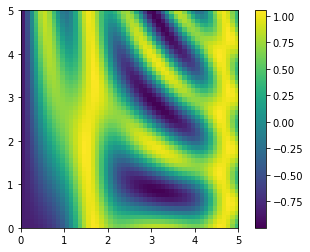

In [30]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();